Import Libraries

In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
from matplotlib import ticker
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

Load Data

In [35]:
df = pd.read_csv('../../../../Data/Dataset/Xiaomi_clean.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-09,16.600000,17.000000,16.000000,16.799999,16.799999,462182642
1,2018-07-10,17.000000,19.340000,17.000000,19.000000,19.000000,534072218
2,2018-07-11,18.500000,19.799999,18.299999,19.000000,19.000000,374721138
3,2018-07-12,19.400000,19.700001,19.020000,19.260000,19.260000,132592630
4,2018-07-13,19.600000,21.799999,19.520000,21.450001,21.450001,364065075
...,...,...,...,...,...,...,...
1795,2025-10-22,46.000000,46.740002,45.700001,46.340000,46.340000,121391262
1796,2025-10-23,46.020000,47.080002,45.700001,46.740002,46.740002,106829656
1797,2025-10-24,47.099998,47.400002,45.740002,45.919998,45.919998,170946122
1798,2025-10-27,45.720001,46.000000,43.880001,45.799999,45.799999,282836746


Reset index

In [36]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

# Select the Close column as the dependent variable
ts = df['Close']
ts = ts.dropna()

Data splitting

In [37]:
# Split the data into training, validation and test dataset in a ratio of 6:2:2
train_size = int(0.6 * len(ts))
val_size = int(0.2 * len(ts))
test_size = len(ts) - train_size - val_size

ts_train = ts[: train_size]
ts_val = ts[train_size : train_size + val_size]
ts_test = ts[train_size + val_size :]

Training process

In [38]:
model = auto_arima(
    ts_train,
    seasonal=False,                
    stepwise=True,               
    approximation=False,          
    information_criterion='aicc',  
    method='nm',                   
    with_intercept=True,           
    allowdrift=True,
    allowmean=True,
    enforce_stationarity=True,     
    enforce_invertibility=True,                 
    error_action='ignore',         
    suppress_warnings=True,
    trace=True
)

c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' wa

Performing stepwise search to minimize aicc
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AICC=1711.184, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AICC=1705.079, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AICC=1705.376, Time=0.13 sec


c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AICC=1705.348, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AICC=1703.210, Time=0.03 sec


c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AICC=1707.354, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.883 seconds


In [39]:
# Fit the model
model.fit(ts_train)

c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,order,"(0, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'nm'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,False


Validate Processing

In [40]:
y_pred_val = model.predict(n_periods=len(ts_val))
y_val = ts_val.values
model.update(y_val)


c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,order,"(0, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'nm'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,False


Testing Processing

In [41]:
y_pred_test = model.predict(n_periods=len(ts_test))
y_test = ts_test.values
model.update(y_test)

c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,order,"(0, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'nm'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,False


Evaluate Model

In [42]:
#Validation metrics 
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
val_msle = mean_squared_log_error(y_val, y_pred_val)

#Test metrics
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_msle = mean_squared_log_error(y_test, y_pred_test)
print(f"### On Validation Set:")
print(f"MAPE : {val_mape:.4f}")
print(f"RMSE : {val_rmse:.4f}")
print(f"MSLE : {val_msle:.4f}")
print(f"### On Test Set:")
print(f"MAPE : {test_mape:.4f}")
print(f"RMSE : {test_rmse:.4f}")
print(f"MSLE : {test_msle:.4f}")

### On Validation Set:
MAPE : 0.1841
RMSE : 3.2439
MSLE : 0.0568
### On Test Set:
MAPE : 0.4201
RMSE : 24.1260
MSLE : 0.5091


Predicting the next 30 days

In [43]:
#Preparing date index for future predictions
last_date = ts.index[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

#Forecasting next 30 days
forecast_30 = model.predict(n_periods=30)

# Print the predicted closing prices for the next 30 days
forecast_df = pd.DataFrame({
    'Date': next_30_days,
    'Predicted_Close': forecast_30
})
forecast_df.set_index('Date', inplace=True)
print("Predicted closing prices for the next 30 days:")
forecast_df



Predicted closing prices for the next 30 days:


c:\Users\capta\Downloads\IS403.Q12-\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Predicted_Close
Date,
2025-10-29,44.919998
2025-10-30,44.919998
2025-10-31,44.919998
2025-11-01,44.919998
2025-11-02,44.919998
2025-11-03,44.919998
2025-11-04,44.919998
2025-11-05,44.919998
2025-11-06,44.919998


Visualization

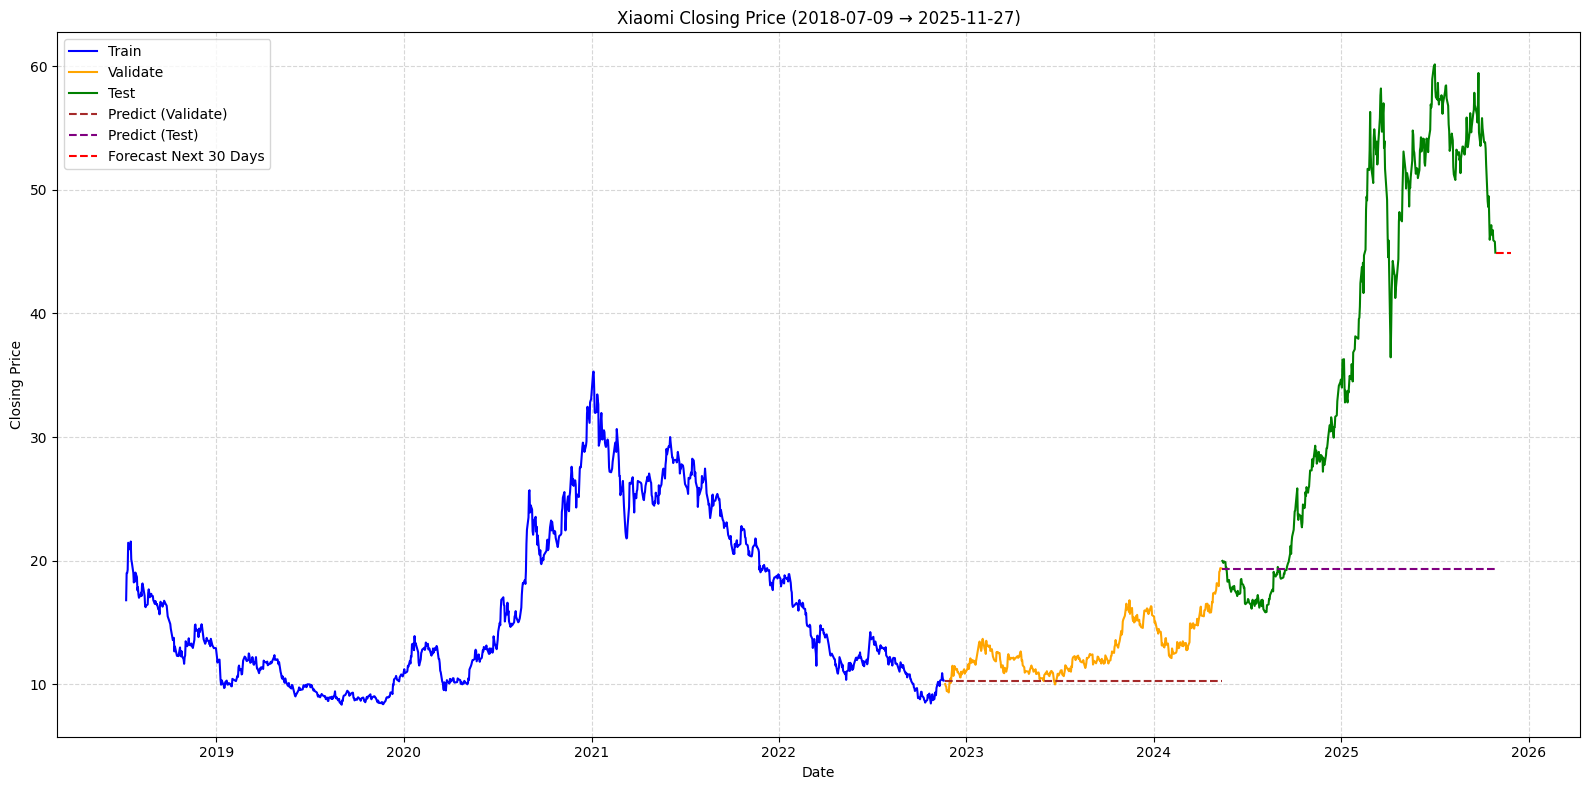

In [44]:
plt.figure(figsize=(16, 8))

# Draw train, validate, test
plt.plot(ts_train.index, ts_train, label='Train', color='blue')
plt.plot(ts_val.index, ts_val, label='Validate', color='orange')
plt.plot(ts_test.index, ts_test, label='Test', color='green')

# Draw predictions on validate and test set
plt.plot(ts_val.index, y_pred_val, label='Predict (Validate)', color='brown', linestyle='--')
plt.plot(ts_test.index, y_pred_test, label='Predict (Test)', color='purple', linestyle='--')

# Draw forecast for next 30 days
plt.plot(forecast_df.index, forecast_df['Predicted_Close'], label='Forecast Next 30 Days', color='red', linestyle='--')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.title(f"Xiaomi Closing Price ({ts.index[0].strftime('%Y-%m-%d')} → {forecast_df.index[-1].strftime('%Y-%m-%d')})")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.savefig('./Image/Xiaomi_ARIMA_622.png')
plt.tight_layout()
plt.show()
